In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import openpyxl
from scipy.stats import ranksums
from scipy import stats
import pandas as pd
import dataframe_image as dfi
import sklearn
from mne.stats import fdr_correction

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
cv_num=5

# Performance Comparison

In [76]:
level = "genus"

In [77]:

# Parameters to set before experiments

model_name = ['Logistic Regression','Linear SVM','Random Forest','XGBoost','MLP-Perceptron','MLP-1 hidden layer','MLP-2 hidden layer','MLP-3 hidden layer']
performance_name = ['AUC','Sensitivity','Specificity','PPV','NPV','Accuracy','MCC']


In [78]:


experiment_name = ["raw","binarized_zero","binarized_standard"]
real_exp_name = ["Original","Binarization by zero", "Binarization by SHAP(Proposed Algorithm)"]
alp_list = ["B","C","D","E","F","G","H","I"]

In [29]:
for perf_index,perf_name in enumerate(performance_name):
    

    
    table_file_org = openpyxl.load_workbook('../graph/performance/%s/%s.xlsx'%(level,perf_name))
    table_file = table_file_org.active
    
    table_file = table_file_org.active
    table_file['A1']= perf_name

    
    
    for mod_index,mod_name in enumerate(model_name):
        table_file['A%s'%(2+mod_index)] = mod_name 
        
    for exp_index,exp_name in enumerate(experiment_name):
        table_file['%s1'%alp_list[exp_index]]=  real_exp_name[exp_index]
        
        performance_total = np.load("../classification/%s/%s/performance_total.npy"%(level,exp_name))
        
        for mod_index,mod_name in enumerate(model_name):
            table_file['%s%s'%(alp_list[exp_index],2+mod_index)]=  r'%0.3f ± %0.2f'%(np.average(performance_total[mod_index,perf_index,:]),np.std(performance_total[mod_index,perf_index,:]))
            
    
    
    table_file['%s1'%alp_list[len(experiment_name)]]=  "p-value: comparing Binarization with optimal from original data"
        
        
        
    for mod_index,mod_name in enumerate(model_name):
        
        performance_total_raw = np.load("../classification/%s/%s/performance_total.npy"%(level,"raw"))
#         original_score =  np.average(performance_total[mod_index,perf_index,:])
        
        performance_total_shap_bin = np.load("../classification/%s/%s/performance_total.npy"%(level,"binarized_standard"))
#         proposed_score =  np.average(performance_total[mod_index,perf_index,:])
        
        
        pvalue = ranksums(performance_total_shap_bin[mod_index,-1,:],performance_total_raw[mod_index,-1,:],alternative='greater').pvalue
        
        
        table_file['%s%s'%(alp_list[len(experiment_name)],2+mod_index)]= np.round(pvalue,3)
        
        
    
    
    
    table_file_org.save('../graph/performance/%s/%s.xlsx'%(level,perf_name))


# Performance comparison- statistics

In [ ]:
# https://bookdown.org/yuaye_kt/RTIPS/ANOVA.html
#     https://medistat.tistory.com/82
#         https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [ ]:
# performance total: 1st dimension: ml model, 2nd dimension: perf index

In [ ]:
level = "species"

In [15]:
for mod_index,mod_name in enumerate(model_name):

    performance_total_raw = np.load("../classification/%s/%s/performance_total.npy"%(level,"raw"))
    performance_total_shap_bin = np.load("../classification/%s/%s/performance_total.npy"%(level,"binarized_standard"))
    print(ranksums(performance_total_shap_bin[mod_index,-1,:],performance_total_raw[mod_index,-1,:],alternative='greater').pvalue)



0.004511719409040163
0.004511719409040163
0.30075406722029496
0.45840747426404427
0.004511719409040163
0.004511719409040163
0.014140061284138477
0.014140061284138477


In [16]:
level = "genus"
for mod_index,mod_name in enumerate(model_name):

    performance_total_raw = np.load("../classification/%s/%s/performance_total.npy"%(level,"raw"))
    performance_total_shap_bin = np.load("../classification/%s/%s/performance_total.npy"%(level,"binarized_standard"))
    print(ranksums(performance_total_shap_bin[mod_index,-1,:],performance_total_raw[mod_index,-1,:],alternative='greater').pvalue)



0.004511719409040163
0.004511719409040163
0.45840747426404427
0.3770112650310374
0.004511719409040163
0.004511719409040163
0.004511719409040163
0.008146801810514264


# Biomarker Name

In [12]:
num_biomarker = 17

In [13]:
data_location ="../../Dataset/raw/species/db1629.xlsx"
raw_data = openpyxl.load_workbook(data_location,read_only=True)
raw_data = raw_data.get_sheet_by_name('taxonomy')


In [14]:
total_rank = (rank_training+1)[:num_biomarker].copy()
total_rank = np.append(total_rank,(rank_test+1)[:num_biomarker])
total_rank = np.append(total_rank,(rank_test_diff+1)[:num_biomarker]) 
total_rank = np.unique(total_rank)

NameError: name 'rank_training' is not defined

In [ ]:
total_rank

In [ ]:

table_file_org = openpyxl.load_workbook('../graph/SHAP/nameofbiomarkers.xlsx')
table_file = table_file_org.active

for index,rank_name in enumerate(total_rank):
    table_file['A%s'%(index+1)] = raw_data.cell(row=rank_name+1,column=1).value[8:]
    full_name = ""
    for taxonomy_level in range(7):
        table_file['%s%s'%(alp_list[taxonomy_level],index+1)] =raw_data.cell(row=rank_name+1,column=2+taxonomy_level).value[3:]
#         full_name+=raw_data.cell(row=rank_name+1,column=2+taxonomy_level).value+" "
#         table_file['B%s'%(index+1)] = full_name
        


table_file_org.save('../graph/SHAP/nameofbiomarkers.xlsx')


In [24]:
alp_list = ["B","C","D","E","F","G","H","I"]

# Feature Rank Difference

In [62]:
# level = "genus"
level = "species"

In [63]:
data_name = 'raw'
training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,0))

feature_index_list = np.arange(1,training_features.shape[1]+1)
feature_name = np.arange(1,training_features.shape[1]+1)

rank_all_feature = np.zeros((3,training_features.shape[1]))
rank_all_index= np.zeros((3,training_features.shape[1]))

In [64]:
marker_size= 17


In [65]:
def rank_each_feature(rank_array):
    rank_each_feature = np.zeros((rank_array.shape[0]))
    for i in range(rank_array.shape[0]):
        rank_each_feature[rank_array[i]] = i
    return rank_each_feature

In [66]:

for index, data_name in enumerate(["raw","binarized_zero","binarized_standard"]):
    total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
    total_training_features = np.empty((0,len(feature_name)), float)

    for fold_num in range(cv_num):
        training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

        temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
        total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

        total_training_features = np.append(total_training_features,training_features,axis=0)

    randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
    randomforest_shap = randomforest_shap.reshape(len(feature_name),)
    
    rank_all_feature[index] = rank_each_feature(randomforest_shap.argsort()[::-1])
    rank_all_index[index] = randomforest_shap.argsort()[::-1]

    

In [67]:
diff_from_top = np.zeros((2,marker_size))
diff_from_top_total = np.zeros((2,training_features.shape[1]))

list_markers_original = rank_all_index[0][0:marker_size].copy()
for i in range(marker_size):
    diff_from_top[0,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[1][int(list_markers_original[i])])
    diff_from_top[1,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[2][int(list_markers_original[i])])
    
    
list_markers_original = rank_all_index[0][0:training_features.shape[0]].copy()
for i in range(training_features.shape[1]):
    diff_from_top_total[0,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[1][int(list_markers_original[i])])
    diff_from_top_total[1,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[2][int(list_markers_original[i])])

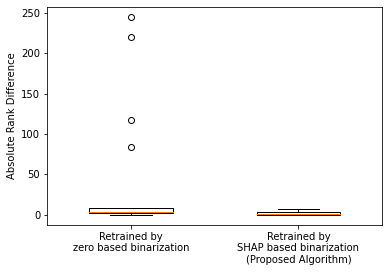

In [68]:
type_algorithm = ["Retrained by zero","Retrained by SHAP standard(Proposed Algorithm)"]
plt.figure(figsize=(6, 4))
plt.boxplot([diff_from_top[0],diff_from_top[1]],widths=0.5)
# text = "Rank difference in top %s features\nZero based binarization: %s\nSHAP standard based binarization: %s"%(marker_size,np.average(diff_from_top[0]),np.average(diff_from_top[1]))
# plt.text(2.5,200,text)
# plt.xticks([])
plt.xticks([1,2],["Retrained by\nzero based binarization","Retrained by\nSHAP based binarization\n(Proposed Algorithm)"])
plt.ylabel("Absolute Rank Difference")
# plt.title("Level=%s\nTotal feature size=%s"%(level,training_features.shape[1]))
plt.savefig('../graph/SHAP/rank_difference_17_%s.jpg'%(level), dpi=500, bbox_inches='tight')
plt.show()

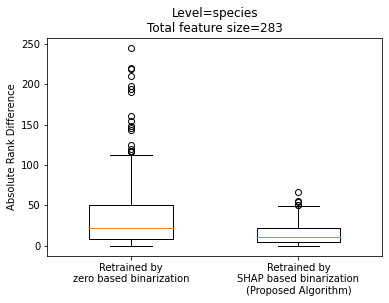

In [69]:
type_algorithm = ["Retrained by zero","Retrained by SHAP standard(Proposed Algorithm)"]
plt.figure(figsize=(6, 4))
plt.boxplot([diff_from_top_total[0],diff_from_top_total[1]],widths=0.5)
# text = "Rank difference in top %s features\nZero based binarization: %s\nSHAP standard based binarization: %s"%(marker_size,np.average(diff_from_top[0]),np.average(diff_from_top[1]))
# plt.text(2.5,200,text)
# plt.xticks([])
plt.xticks([1,2],["Retrained by\nzero based binarization","Retrained by\nSHAP based binarization\n(Proposed Algorithm)"])
plt.ylabel("Absolute Rank Difference")
plt.title("Level=%s\nTotal feature size=%s"%(level,training_features.shape[1]))
plt.savefig('../graph/SHAP/rank_difference_%s.jpg'%(level), dpi=500, bbox_inches='tight')
plt.show()

In [44]:
# species
print(np.percentile(diff_from_top_total[0], 75))
print(np.percentile(diff_from_top_total[1], 75))

print(np.percentile(diff_from_top_total[0], 50))
print(np.percentile(diff_from_top_total[1], 50))

50.0
22.0
22.0
11.0


In [53]:
# genus
print(np.percentile(diff_from_top_total[0], 75))
print(np.percentile(diff_from_top_total[1], 75))

print(np.percentile(diff_from_top_total[0], 50))
print(np.percentile(diff_from_top_total[1], 50))

44.0
15.25
17.0
8.0


In [33]:
# Genus
print(np.average(np.abs(diff_from_top_total[0])))
print(np.average(np.abs(diff_from_top_total[1])))

print(np.sum(np.abs(diff_from_top_total[0])>training_features.shape[1]/5))
print(np.sum(np.abs(diff_from_top_total[1])>training_features.shape[1]/5))

print(np.sum(np.abs(diff_from_top_total[0])>training_features.shape[1]/10))
print(np.sum(np.abs(diff_from_top_total[1])>training_features.shape[1]/10))

5.622611464968153
1.8296178343949046
50
1
93
21


In [41]:
# Species
print(np.average(np.abs(diff_from_top_total[0])))
print(np.average(np.abs(diff_from_top_total[1])))

print(np.sum(np.abs(diff_from_top_total[0])>training_features.shape[1]/5))
print(np.sum(np.abs(diff_from_top_total[1])>training_features.shape[1]/5))

print(np.sum(np.abs(diff_from_top_total[0])>training_features.shape[1]/10))
print(np.sum(np.abs(diff_from_top_total[1])>training_features.shape[1]/10))

8.476114649681529
3.2977707006369426
62
1
124
48


# Feature Rank Difference with continuous value/feature rank in every feature

In [3]:
# level = "genus"
level = "species"

data_name = 'raw'
training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,0))
marker_size = 17
feature_index_list = np.arange(1,training_features.shape[1]+1)
feature_name = np.arange(1,training_features.shape[1]+1)

rank_all_feature = np.zeros((3,training_features.shape[1]))
rank_all_index= np.zeros((3,training_features.shape[1]))

In [4]:
def rank_each_feature(rank_array):
    rank_each_feature = np.zeros((rank_array.shape[0]))
    for i in range(rank_array.shape[0]):
        rank_each_feature[rank_array[i]] = i
    return rank_each_feature

In [5]:

for index, data_name in enumerate(["raw","binarized_zero","binarized_standard"]):
    total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
    total_training_features = np.empty((0,len(feature_name)), float)

    for fold_num in range(cv_num):
        training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

        temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
        total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

        total_training_features = np.append(total_training_features,training_features,axis=0)

    randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
    randomforest_shap = randomforest_shap.reshape(len(feature_name),)
    
    rank_all_feature[index] = rank_each_feature(randomforest_shap.argsort()[::-1])
    rank_all_index[index] = randomforest_shap.argsort()[::-1]

    

In [6]:
diff_from_top = np.zeros((2,marker_size))
diff_from_top_total = np.zeros((2,training_features.shape[1]))

list_markers_original = rank_all_index[0][0:marker_size].copy()
for i in range(marker_size):
    diff_from_top[0,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[1][int(list_markers_original[i])])
    diff_from_top[1,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[2][int(list_markers_original[i])])
    
    
list_markers_original = rank_all_index[0][0:training_features.shape[0]].copy()
for i in range(training_features.shape[1]):
    diff_from_top_total[0,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[1][int(list_markers_original[i])])
    diff_from_top_total[1,i] = np.abs(rank_all_feature[0][int(list_markers_original[i])]-rank_all_feature[2][int(list_markers_original[i])])

In [7]:
diff_from_top_total.shape

(2, 283)

In [8]:
average_value_each_feature = np.zeros((total_training_features.shape[1],))
for i in range(total_training_features.shape[1]):
    average_value_each_feature[i]= np.average(total_training_features[:,int(rank_all_index[0][i])])
    

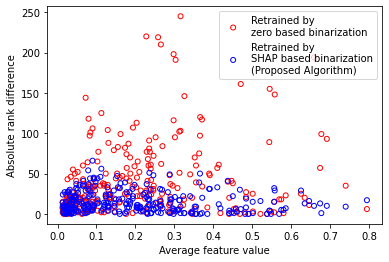

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(average_value_each_feature,diff_from_top_total[0,:],s=25, facecolors='none', edgecolors='r')
plt.scatter(average_value_each_feature,diff_from_top_total[1,:],s=25, facecolors='none', edgecolors='b')
plt.xlabel("Average feature value")
plt.ylabel("Absolute rank difference")
plt.legend(["Retrained by\nzero based binarization","Retrained by\nSHAP based binarization\n(Proposed Algorithm)"])
plt.savefig('../graph/SHAP/rank_difference_feature_value_%s.jpg'%(level), dpi=500, bbox_inches='tight')

plt.show()

In [17]:

avg_difference = np.zeros((10,2))
feature_avg = np.zeros((10,))
for i in range(10):
    low = np.quantile(average_value_each_feature,0.1*i)
    high = np.quantile(average_value_each_feature,0.1*i+0.1)
    
    
    loc = (low<=average_value_each_feature) * (high>average_value_each_feature)
    feature_avg[i] = np.average(average_value_each_feature[loc])
    avg_difference[i,0] = np.average(diff_from_top_total[0,:][loc])
    avg_difference[i,1] = np.average(diff_from_top_total[1,:][loc])

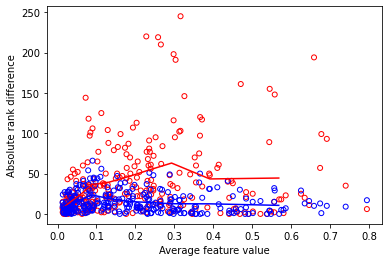

In [20]:
plt.figure(figsize=(6, 4))
plt.scatter(average_value_each_feature,diff_from_top_total[0,:],s=25, facecolors='none', edgecolors='r')
plt.scatter(average_value_each_feature,diff_from_top_total[1,:],s=25, facecolors='none', edgecolors='b')

plt.plot(feature_avg,avg_difference[:,0],'r')
plt.plot(feature_avg,avg_difference[:,1],'b')

plt.xlabel("Average feature value")
plt.ylabel("Absolute rank difference")
# plt.legend(["Retrained by\nzero based binarization","Retrained by\nSHAP based binarization\n(Proposed Algorithm)"])
# plt.savefig('../graph/SHAP/rank_difference_feature_value_%s.jpg'%(level), dpi=500, bbox_inches='tight')

plt.show()

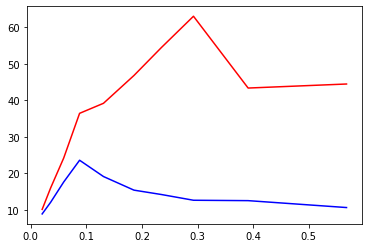

In [21]:

plt.plot(feature_avg,avg_difference[:,0],'r')
plt.plot(feature_avg,avg_difference[:,1],'b')


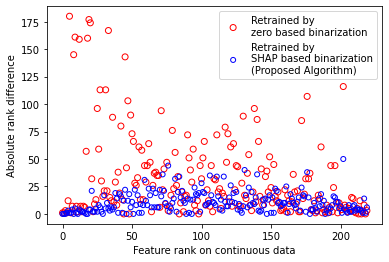

In [75]:
plt.figure(figsize=(6, 4))

plt.scatter(np.arange(0,training_features.shape[1]),diff_from_top_total[0,:], facecolors='none', edgecolors='r')
plt.scatter(np.arange(0,training_features.shape[1]),diff_from_top_total[1,:],s=25, facecolors='none', edgecolors='b')
plt.xlabel("Feature rank on continuous data")
plt.ylabel("Absolute rank difference")
plt.legend(["Retrained by\nzero based binarization","Retrained by\nSHAP based binarization\n(Proposed Algorithm)"])
plt.savefig('../graph/SHAP/rank_difference_original_rank_%s.jpg'%(level), dpi=500, bbox_inches='tight')

plt.show()

# ANOVA analysis for SHAP values

In [146]:
pvalue_distribution_total = np.zeros((4,len(feature_name)))


pvalue_distribution = np.zeros((len(feature_name)))

data_name = "raw"


total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
total_training_features = np.empty((0,len(feature_name)), float)

for fold_num in range(cv_num):
    training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

    temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
    total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

    total_training_features = np.append(total_training_features,training_features,axis=0)

randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
randomforest_shap = randomforest_shap.reshape(len(feature_name),)
rank = randomforest_shap.argsort()[::-1]


for i in range(total_training_features.shape[0]):
    for j in range(total_training_features.shape[1]):
        total_training_features[i,j]= 1 if total_training_features[i,j]>0 else 0


pvalue_distribution = np.zeros((len(feature_name)))
for feature_index in range(len(feature_name)):
    presence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==1]
    absence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==0]
    fvalue, pvalue = stats.f_oneway(presence_shap,absence_shap)
    pvalue_distribution[feature_index] = pvalue

pvalue_distribution = pvalue_distribution[rank]

pvalue_distribution_total[0] = pvalue_distribution


##############standard

total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
total_training_features = np.empty((0,len(feature_name)), float)

for fold_num in range(cv_num):
    training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

    temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
    total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

    standard = np.load("../classification/%s/%s/standard/%s_SHAP_standard.npy"%(level,data_name,fold_num))
    
    

    for i in range(training_features.shape[0]):
        for j in range(training_features.shape[1]):
            training_features[i,j]= 1 if training_features[i,j]>standard[j] else 0

    
    
    total_training_features = np.append(total_training_features,training_features,axis=0)

randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
randomforest_shap = randomforest_shap.reshape(len(feature_name),)
rank = randomforest_shap.argsort()[::-1]


pvalue_distribution = np.zeros((len(feature_name)))
for feature_index in range(len(feature_name)):
    presence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==1]
    absence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==0]
    fvalue, pvalue = stats.f_oneway(presence_shap,absence_shap)
    pvalue_distribution[feature_index] = pvalue

pvalue_distribution = pvalue_distribution[rank]

pvalue_distribution_total[1] = pvalue_distribution




###########re-training


data_name = ["binarized_zero","binarized_standard"]

for index,data_name in enumerate(["binarized_zero","binarized_standard"]):
    total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
    total_training_features = np.empty((0,len(feature_name)), float)

    for fold_num in range(cv_num):
        training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

        temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
        total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

        total_training_features = np.append(total_training_features,training_features,axis=0)

    randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
    randomforest_shap = randomforest_shap.reshape(len(feature_name),)
    rank = randomforest_shap.argsort()[::-1]

    pvalue_distribution = np.zeros((len(feature_name)))
    for feature_index in range(len(feature_name)):
        presence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==1]
        absence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==0]
        fvalue, pvalue = stats.f_oneway(presence_shap,absence_shap)
        pvalue_distribution[feature_index] = pvalue

    pvalue_distribution = pvalue_distribution[rank]
    
    pvalue_distribution_total[index+2] = pvalue_distribution
    
    

In [147]:
pvalue_distribution_total = np.nan_to_num(pvalue_distribution_total, copy=True, nan=0.0, posinf=None, neginf=None)

In [148]:
print(np.average(pvalue_distribution_total,axis=1))

[0.00629294 0.00752251 0.00516103 0.00900587]


In [145]:

print(np.sum(pvalue_distribution_total>0.01,axis=1))

[6 5 6 8]


In [143]:
pvalue_distribution_total[0]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 9.02876431e-008, 0.00000000e+000,
       3.89699936e-004, 4.11322936e-244, 1.54363017e-004, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 9.26834878e-001, 2.99734269e-287, 2.32759468e-001,
       0.00000000e+000, 0.00000000e+000, 4.09008405e-018, 0.00000000e+000,
       5.56864423e-030, 3.14882369e-193, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 4.59895923e-032, 1.25371922e-002, 6.29527262e-042,
       7.09039806e-219, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 3.68287899e-180, 4.26524033e-135,
       4.07771633e-018, 2.99377243e-080, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.35396553e-221, 0.00000000e+000,
       1.26506616e-282, 0

In [129]:
observed_range = 10
print(np.max(pvalue_distribution_total[0][:observed_range]))
print(np.max(pvalue_distribution_total[1][:observed_range]))

0.7496487044035377
0.10715828332798948


In [134]:

print(np.sum(pvalue_distribution_total[0]>0.05))
print(np.sum(pvalue_distribution_total[1]>0.05))

print(np.sum(pvalue_distribution_total[0]>0.01))
print(np.sum(pvalue_distribution_total[1]>0.01))

print(np.sum(pvalue_distribution_total[0]>0.001))
print(np.sum(pvalue_distribution_total[1]>0.001))

4
6
6
8
9
8


In [150]:
pvalue_distribution_total = np.zeros((4,len(feature_name)))


pvalue_distribution = np.zeros((len(feature_name)))

data_name = "raw"


total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
total_training_features = np.empty((0,len(feature_name)), float)

for fold_num in range(cv_num):
    training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

    temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
    total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

    total_training_features = np.append(total_training_features,training_features,axis=0)

randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
randomforest_shap = randomforest_shap.reshape(len(feature_name),)
rank = randomforest_shap.argsort()[::-1]


for i in range(total_training_features.shape[0]):
    for j in range(total_training_features.shape[1]):
        total_training_features[i,j]= 1 if total_training_features[i,j]>0 else 0


pvalue_distribution = np.zeros((len(feature_name)))
for feature_index in range(len(feature_name)):
    presence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==1]
    absence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==0]
    fvalue, pvalue = stats.ttest_ind(presence_shap,absence_shap)
    pvalue_distribution[feature_index] = pvalue

pvalue_distribution = pvalue_distribution[rank]

pvalue_distribution_total[0] = pvalue_distribution


##############standard

total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
total_training_features = np.empty((0,len(feature_name)), float)

for fold_num in range(cv_num):
    training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

    temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
    total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

    standard = np.load("../classification/%s/%s/standard/%s_SHAP_standard.npy"%(level,data_name,fold_num))
    
    

    for i in range(training_features.shape[0]):
        for j in range(training_features.shape[1]):
            training_features[i,j]= 1 if training_features[i,j]>standard[j] else 0

    
    
    total_training_features = np.append(total_training_features,training_features,axis=0)

randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
randomforest_shap = randomforest_shap.reshape(len(feature_name),)
rank = randomforest_shap.argsort()[::-1]


pvalue_distribution = np.zeros((len(feature_name)))
for feature_index in range(len(feature_name)):
    presence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==1]
    absence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==0]
    fvalue, pvalue = stats.ttest_ind(presence_shap,absence_shap)
    pvalue_distribution[feature_index] = pvalue

pvalue_distribution = pvalue_distribution[rank]

pvalue_distribution_total[1] = pvalue_distribution




###########re-training


data_name = ["binarized_zero","binarized_standard"]

for index,data_name in enumerate(["binarized_zero","binarized_standard"]):
    total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
    total_training_features = np.empty((0,len(feature_name)), float)

    for fold_num in range(cv_num):
        training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))

        temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
        total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

        total_training_features = np.append(total_training_features,training_features,axis=0)

    randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
    randomforest_shap = randomforest_shap.reshape(len(feature_name),)
    rank = randomforest_shap.argsort()[::-1]

    pvalue_distribution = np.zeros((len(feature_name)))
    for feature_index in range(len(feature_name)):
        presence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==1]
        absence_shap = total_randomforest_shap_values[:,feature_index][total_training_features[:,feature_index]==0]
        fvalue, pvalue = stats.ttest_ind(presence_shap,absence_shap)
        pvalue_distribution[feature_index] = pvalue

    pvalue_distribution = pvalue_distribution[rank]
    
    pvalue_distribution_total[index+2] = pvalue_distribution
    
    

In [152]:
pvalue_distribution_total = np.nan_to_num(pvalue_distribution_total, copy=True, nan=0.0, posinf=None, neginf=None)

In [154]:
print(np.average(pvalue_distribution_total[:,:10],axis=1))

[3.89790224e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [155]:
print(np.sum(pvalue_distribution_total[:,:20],axis=1))

[0.05800692 0.         0.         0.        ]


# Total SHAP percentile plot from original model

In [28]:
display_num = 17

In [29]:
level = "species"
data_name = "raw"
training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,0))

feature_index_list = np.arange(1,training_features.shape[1]+1)
feature_name = np.arange(1,training_features.shape[1]+1)

In [30]:
cv_num=5

In [31]:
total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
total_training_features = np.empty((0,len(feature_name)), float)
total_test_features = np.empty((0,len(feature_name)), float)
total_standard  = np.empty((0,len(feature_name)), float)

for fold_num in range(cv_num):
    training_features = np.load('../../Dataset/%s/%s/%s_training_features.npy'%(data_name,level,fold_num))
    total_training_features = np.append(total_training_features,training_features,axis=0)
    
    temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values.npy"%(level,data_name,fold_num)).copy()
    total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

    standard = np.load("../classification/%s/%s/standard/%s_SHAP_standard.npy"%(level,data_name,fold_num))
    total_standard = np.append(total_standard,standard)
randomforest_shap = np.average(np.abs(total_randomforest_shap_values.copy()),axis=0)
randomforest_shap = randomforest_shap.reshape(len(feature_name),)
rank = randomforest_shap.argsort()[::-1]

In [38]:
# marker_list = np.array([30,177,155,92,183,204,169,195,93,32,114,9,44,77,184,156,50])

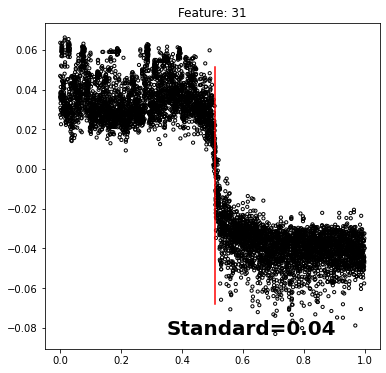

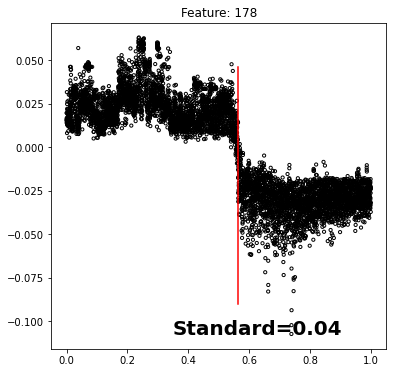

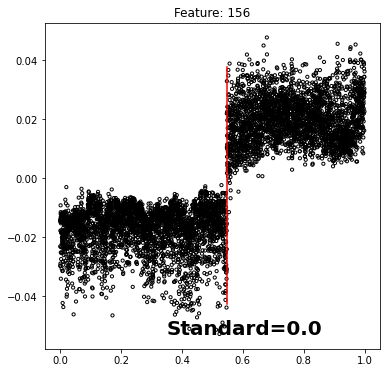

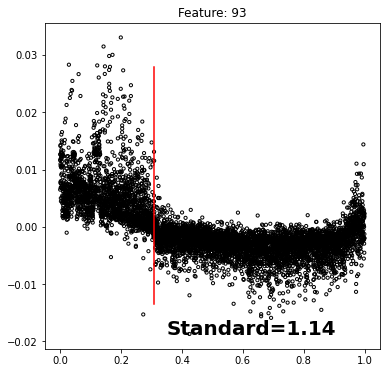

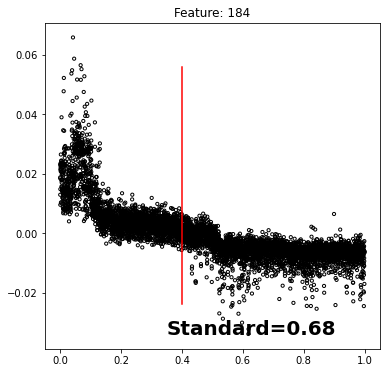

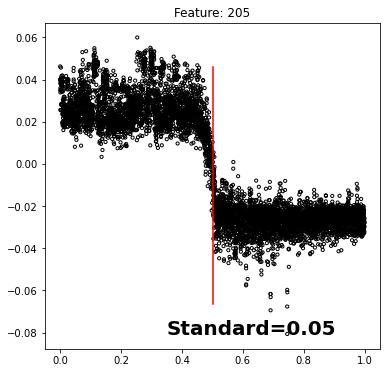

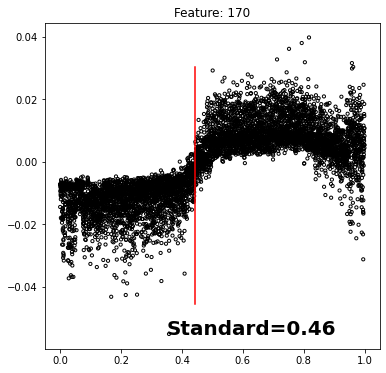

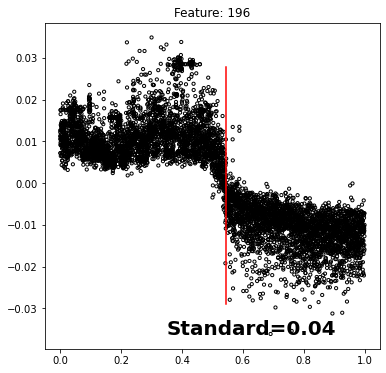

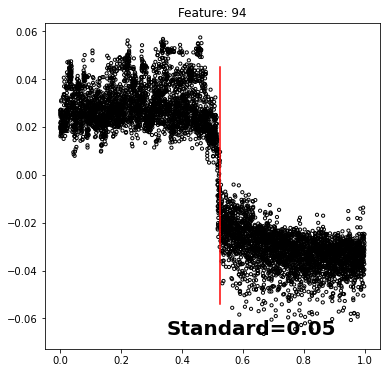

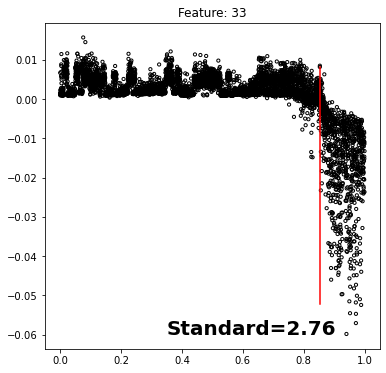

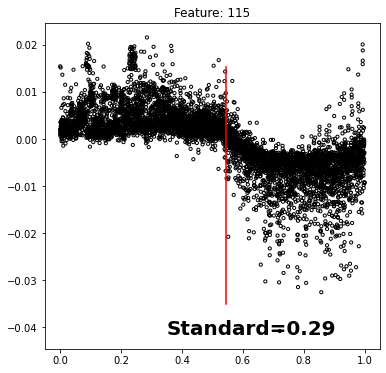

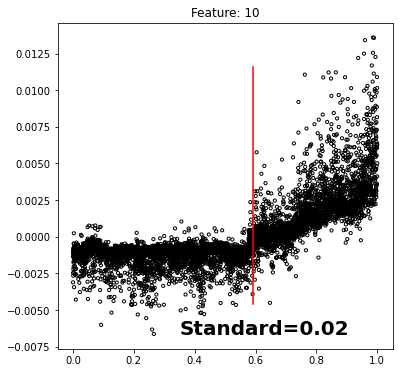

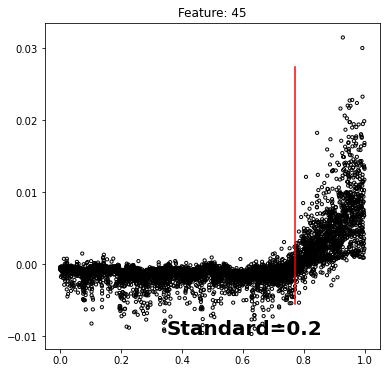

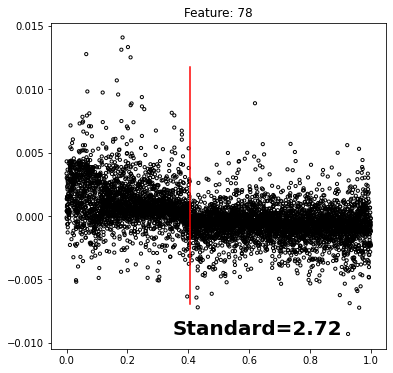

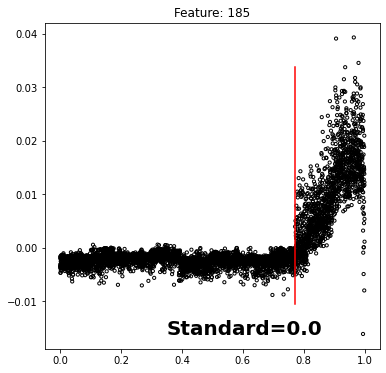

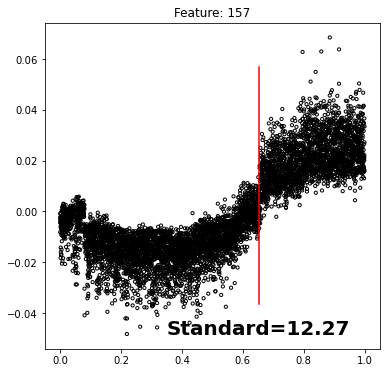

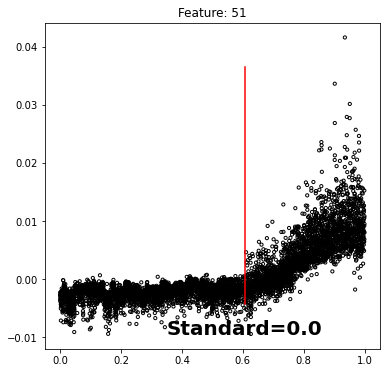

In [39]:
for i in rank[0:display_num]:
# for i in marker_list:

    plt.figure(figsize=(6, 6))
    org_vector = total_training_features[:,i].copy()
    rank_each = org_vector.argsort()
    rel_vector = np.zeros(org_vector.shape[0])
    temp = 0 
    for data_index in range(org_vector.shape[0]):
        rel_vector[rank_each[data_index]] = temp/org_vector.shape[0]
        temp+=1
    plt.scatter(rel_vector,total_randomforest_shap_values[:,i],s=10, facecolors='none', edgecolors='black')


    shap_length = np.max(total_randomforest_shap_values[:,i])-np.min(total_randomforest_shap_values[:,i])
    standard = np.max(np.where(org_vector[org_vector.argsort()]==np.average(total_standard[i])))/org_vector.shape[0]

    plt.plot([standard,standard],[np.min(total_randomforest_shap_values[:,i])+shap_length*0.1,np.max(total_randomforest_shap_values[:,i])-shap_length*0.1],color="red")
#         plt.xlabel("Percentile of feature value")
#         plt.ylabel("SHAP values")
    plt.title("Feature: %s"%(feature_name[i]))
#         text = "Standard=%s±%s"%(np.round(np.average(total_standard[i]),2),np.round(np.std(total_standard[i]),2))
    text = "Standard=%s"%(np.round(np.average(total_standard[i]),2))
    plt.text(0.35, np.min(total_randomforest_shap_values[:,i]),text, weight='bold',fontsize=20)
#     plt.savefig('../result_with_selected_features/%s/#%s/shap_percentile/%s.jpg'%(level,data_num,feature_name[i]), dpi=500, bbox_inches='tight')
    plt.savefig('../classification/%s/%s/shap_percentile/markers/%s.jpg'%(level,data_name,feature_name[i]), dpi=500, bbox_inches='tight')



# Selecting the feature with biggest binarization score gap in original random forest model (Fig 2)

In [18]:
data_name = 'raw'
level = "species"
score_opt = np.zeros((283,5))
score_zero = np.zeros((283,5))
for fold_num in range(cv_num):

    score_opt[:,fold_num]=     np.load("../classification/%s/%s/standard/%s_standard_score_test.npy"%(level,data_name,fold_num))
    score_zero[:,fold_num] =     np.load("../classification/%s/%s/standard/%s_standard_score_test_zero_thres.npy"%(level,data_name,fold_num))


In [36]:
total_randomforest_shap_values = np.empty((0,len(feature_name)), float)
total_test_features = np.empty((0,len(feature_name)), float)
total_standard  = np.empty((0,len(feature_name)), float)

for fold_num in range(cv_num):
    test_features = np.load('../../Dataset/%s/%s/%s_test_features.npy'%(data_name,level,fold_num))
    total_test_features = np.append(total_test_features,test_features,axis=0)
    
    temp_randomforest_shap_values = np.load("../classification/%s/%s/shap_values/%s_randomforest_shap_values_test.npy"%(level,data_name,fold_num)).copy()
    total_randomforest_shap_values = np.append(total_randomforest_shap_values,temp_randomforest_shap_values,axis=0)

    standard = np.load("../classification/%s/%s/standard/%s_SHAP_standard.npy"%(level,data_name,fold_num))
    total_standard = np.append(total_standard,standard)


In [32]:
print(np.average(score_opt,axis=1)[np.argmax(np.average(score_opt,axis=1)-np.average(score_zero,axis=1))])
print(np.std(score_opt,axis=1)[np.argmax(np.average(score_opt,axis=1)-np.average(score_zero,axis=1))])

0.9776927616450622
0.011744677174701316


In [33]:
print(np.average(score_zero,axis=1)[np.argmax(np.average(score_opt,axis=1)-np.average(score_zero,axis=1))])
print(np.std(score_zero,axis=1)[np.argmax(np.average(score_opt,axis=1)-np.average(score_zero,axis=1))])

0.5111475142955983
0.010845846834591806


In [34]:
np.max(np.average(score_opt,axis=1)-np.average(score_zero,axis=1))

0.4665452473494639

In [20]:
np.argmax(score_opt-score_zero)

253

In [9]:
score_zero[np.argmax(score_opt-score_zero)]

0.5111475142955983

In [10]:
np.argmax(score_opt-score_zero)

253

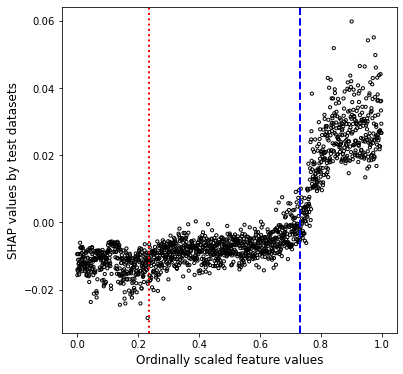

In [37]:
i=253
plt.figure(figsize=(6, 6))
org_vector = total_test_features[:,i].copy()
rank_each = org_vector.argsort()
rel_vector = np.zeros(org_vector.shape[0])
temp = 0 
for data_index in range(org_vector.shape[0]):
    rel_vector[rank_each[data_index]] = temp/org_vector.shape[0]
    temp+=1
plt.scatter(rel_vector,total_randomforest_shap_values[:,i],s=10, facecolors='none', edgecolors='black')


shap_length = np.max(total_randomforest_shap_values[:,i])-np.min(total_randomforest_shap_values[:,i])
standard = np.max(np.where(org_vector[org_vector.argsort()]==np.average(total_standard[i])))/org_vector.shape[0]


plt.axvline(np.sum(org_vector==0)/org_vector.shape[0], color='r', linestyle='dotted', linewidth=2)
plt.axvline(standard, color='b', linestyle='--', linewidth=2)

# plt.plot([standard,standard],[np.min(total_randomforest_shap_values[:,i])+shap_length*0.1,np.max(total_randomforest_shap_values[:,i])-shap_length*0.1],color="red")
# plt.title("Feature: %s"%(feature_name[i]))
# text = "Standard=%s"%(np.round(np.average(total_standard[i]),2))
# plt.text(0.35, np.min(total_randomforest_shap_values[:,i]),text, weight='bold',fontsize=20)

plt.xlabel("Ordinally scaled feature values",fontsize=12)
plt.ylabel("SHAP values by test datasets",fontsize=12)
plt.savefig('../classification/%s/%s/shap_percentile/markers/%s.jpg'%(level,data_name,feature_name[i]), dpi=600, bbox_inches='tight')



# Average+STD analysis

In [43]:
marker_list = np.array([30,177,155,92,183,204,169,195,93,32,114,9,44,77,184,156,50])

In [42]:
data_name = "raw"
level="species"
features = np.load('../../Dataset/%s/%s/features.npy'%(data_name,level))
label = np.load('../../Dataset/%s/%s/label.npy'%(data_name,level))


In [50]:
p_value_each_feature = np.zeros((features.shape[1],))
for i in range(features.shape[1]):
    p_value_each_feature[i] = ranksums( features[:,i][label==1], features[:,i][label==0]).pvalue
adjusted_p_value = fdr_correction(p_value_each_feature)[1]

In [52]:
config_file_org=openpyxl.load_workbook('../graph/data_analysis/data_distribution.xlsx')
config_file = config_file_org.active


In [ ]:
config_file['C1'] = "Negative-Flu"
config_file['D1'] = "Positive-Flu"
config_file['E1'] = "p-value-Flu"
config_file['F1'] = "Negative-RSV"
config_file['G1'] = "Positive-RSV"
config_file['H1'] = "p-value-RSV"


config_file['A2'] = "Test Type"

config_file['A3'] = "PCR"
config_file['A4'] = "RAT without PCR"
config_file['A5'] = "Without RAT&PCR"



In [57]:
for index,i in enumerate(marker_list):
    config_file['A%s'%(index+2)] = i+1
    if adjusted_p_value[i]<0.001:
        config_file['B%s'%(index+2)] = "<0.001"
    else:
        config_file['B%s'%(index+2)] = np.round(adjusted_p_value[i],4)
    config_file['C%s'%(index+2)] = "%s±%s"%(np.round(np.average(features[:,i][label==0]),2),np.round(np.std(features[:,i][label==0]),2))
    config_file['D%s'%(index+2)] = "%s±%s"%(np.round(np.average(features[:,i][label==1]),2),np.round(np.std(features[:,i][label==1]),2))
    
config_file['A%s'%(1)]  = "feature index"
config_file['B%s'%(1)]  = "q-value"
config_file['C%s'%(1)]  = "average±std in non-IBD"
config_file['D%s'%(1)]  = "average±std in IBD"

In [58]:
config_file_org.save("../graph/data_analysis/data_distribution.xlsx")
